In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')

In [9]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
data.shape

(200, 5)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [33]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [51]:
data = data.drop(columns=['Unnamed: 0'])

KeyError: "['Unnamed: 0'] not found in axis"

In [55]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


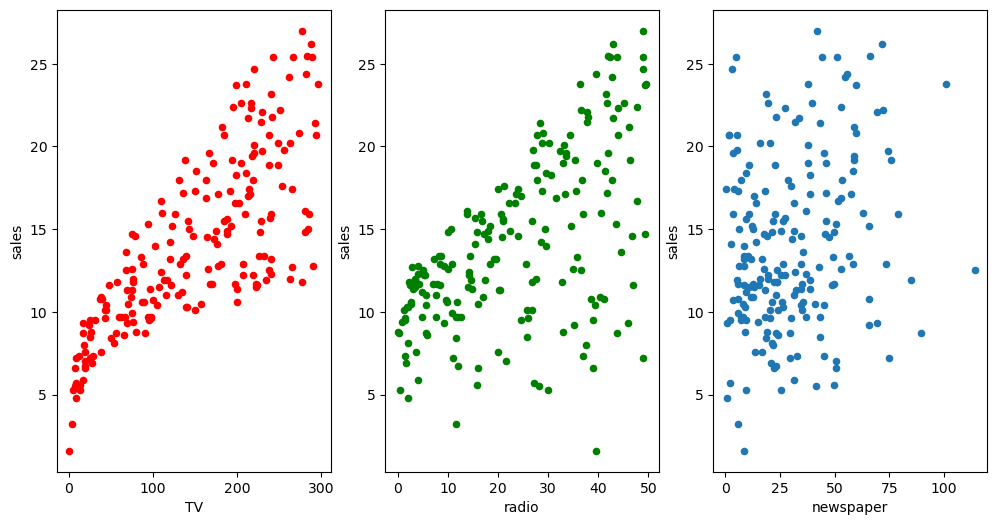

In [65]:
#Visualization using Scatter plot

fig, axs = plt.subplots(1,3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12,6), color='red')
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], color='green')
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('Sample_Data.jpg')

In [75]:
#simple linear regression
# https://www.desmos.com/calculator/2rnqgoa6a4
#taking only one feature

x= data[['TV']]
y= data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y) #(fit= training(train), feature, label)

LinearRegression()

In [81]:
#print intercept and coefficients 
# Y=mx+c m=coefficient, c=intercept, x=data, y= actual
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [83]:
lm.predict([[50]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

In [93]:
from sklearn.metrics import r2_score

In [97]:
predicted_sales = lm.predict(x)

In [103]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [105]:
predicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [107]:
#comppare actual sale numbers with predicted sales
r2_score(y,predicted_sales)

0.611875050850071

In [109]:
x = data[['TV','radio','newspaper']]
y = data.sales

lm = LinearRegression()
lm.fit(x,y)

#printing intercept and coefficient 
print('Intercept: ->', lm.intercept_)
print('TV:->', lm.coef_[0])
print('radio:->', lm.coef_[1])
print('newspaper:->', lm.coef_[2])

Intercept: -> 2.9388893694594067
TV:-> 0.04576464545539761
radio:-> 0.18853001691820462
newspaper:-> -0.0010374930424763159


In [119]:
x = data[['TV','radio']]
y = data.sales

lm.fit(x,y)

predicted_sales = lm.predict(x)
r2_score(y, predicted_sales)

0.8971942610828956

In [117]:
x= data[['TV','radio','newspaper']]
y = data.sales

lm.fit(x,y)

predicted_sales = lm.predict(x)
r2_score(y, predicted_sales)

0.8972106381789522